In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
erp_data = pd.read_csv('data/ERPdata.csv')
demo = pd.read_csv('data/demographic.csv')

In [3]:
gaERPs = erp_data.copy()
gaERPs=gaERPs.merge(demo, on='subject')
gaERPs = gaERPs.drop(gaERPs.columns[5:11], axis=1)
gaERPs = gaERPs.drop(gaERPs.columns[7::], axis=1)
gaERPs[' group'] = gaERPs[' group'].apply(lambda x: 'HC' if x==0 else 'SZ')
gaERPs

,subject,condition,Fz,FCz,Cz,time_ms,group
0,1,1,5.533701,5.726507,5.469535,-1500.0000,HC
1,1,1,5.651489,5.837326,5.773131,-1499.0234,HC
2,1,1,5.717580,5.932924,5.948466,-1498.0469,HC
3,1,1,5.703267,5.968103,5.851512,-1497.0703,HC
4,1,1,5.571578,5.917541,5.812808,-1496.0938,HC
5,1,1,5.603920,5.981694,5.987591,-1495.1172,HC
6,1,1,5.532427,5.868827,5.928261,-1494.1406,HC
7,1,1,5.037233,5.376776,5.388364,-1493.1641,HC
8,1,1,4.805524,5.227869,5.314371,-1492.1875,HC
9,1,1,4.945930,5.424733,5.556252,-1491.2109,HC


In [4]:
gaERPs = gaERPs[(gaERPs.time_ms >= -100) & (gaERPs.time_ms <= 300)].groupby([' group', 'condition','time_ms']).mean()
gaERPs

subject        Fz       FCz        Cz
 group condition time_ms                                          
HC     1         -99.6094   25.00000  0.455273  0.431357  0.139358
                 -98.6328   25.00000  0.435204  0.423137  0.108364
                 -97.6563   25.00000  0.466328  0.454093  0.132008
                 -96.6797   25.00000  0.466787  0.438854  0.150605
                 -95.7031   25.00000  0.456643  0.423483  0.142539
                 -94.7266   25.00000  0.474961  0.412871  0.135812
                 -93.7500   25.00000  0.535091  0.453368  0.168615
                 -92.7734   25.00000  0.502933  0.451463  0.173098
                 -91.7969   25.00000  0.521086  0.479130  0.202102
                 -90.8203   25.00000  0.502284  0.461648  0.168213
                 -89.8438   25.00000  0.489744  0.438992  0.134333
                 -88.8672   25.00000  0.503080  0.446373  0.132219
                 -87.8906   25.00000  0.527578  0.463534  0.155841
                 -86.9141   25.00000  0.469252  0.416945  0.130300
                 -85.9375   25.00000  0.464470  0.403081  0.118256
                 -84.9609   25.00000  0.390585  0.350644  0.093103
                 -83.9844   25.00000  0.461825  0.378919  0.119025
                 -83.0078   25.00000  0.464988  0.373942  0.132377
                 -82.0313   25.00000  0.483286  0.387943  0.148487
                 -81.0547   25.00000  0.458847  0.379906  0.153080
                 -80.0781   25.00000  0.483521  0.419642  0.203129
                 -79.1016   25.00000  0.510323  0.459893  0.257771
                 -78.1250   25.00000  0.443904  0.445804  0.261467
                 -77.1484   25.00000  0.431985  0.436177  0.275341
                 -76.1719   25.00000  0.397236  0.408835  0.234572
                 -75.1953   25.00000  0.393727  0.400545  0.229646
                 -74.2188   25.00000  0.367750  0.376437  0.210281
                 -73.2422   25.00000  0.381842  0.375169  0.216341
                 -72.2656   25.00000  0.427380  0.387468  0.238794
                 -71.2891   25.00000  0.368837  0.327245  0.180964
...                              ...       ...       ...       ...
SZ     3          271.4844  51.44898  1.437324  1.656598  2.014899
                  272.4609  51.44898  1.556710  1.739237  2.089232
                  273.4375  51.44898  1.526313  1.740163  2.095233
                  274.4141  51.44898  1.562995  1.779573  2.118333
                  275.3906  51.44898  1.466971  1.718374  2.076070
                  276.3672  51.44898  1.507686  1.766566  2.098844
                  277.3438  51.44898  1.519267  1.786112  2.095839
                  278.3203  51.44898  1.477659  1.745593  2.080014
                  279.2969  51.44898  1.509183  1.746790  2.079213
                  280.2734  51.44898  1.415332  1.669697  2.002295
                  281.2500  51.44898  1.276399  1.561398  1.908682
                  282.2266  51.44898  1.350561  1.630468  1.929268
                  283.2031  51.44898  1.290106  1.594507  1.884240
                  284.1797  51.44898  1.296658  1.592489  1.873738
                  285.1563  51.44898  1.279815  1.588498  1.867216
                  286.1328  51.44898  1.377893  1.662773  1.914773
                  287.1094  51.44898  1.350972  1.634821  1.907578
                  288.0859  51.44898  1.320864  1.605827  1.901379
                  289.0625  51.44898  1.440754  1.687681  1.959788
                  290.0391  51.44898  1.357858  1.636628  1.905960
                  291.0156  51.44898  1.297650  1.593915  1.874614
                  291.9922  51.44898  1.345877  1.610507  1.904424
                  292.9688  51.44898  1.331013  1.590436  1.871225
                  293.9453  51.44898  1.298911  1.580240  1.832702
                  294.9219  51.44898  1.426241  1.678037  1.887591
                  295.8984  51.44898  1.297023  1.562212  1.799549
                  296.8750  51.44898  1.279030  1.527202  1.771924
         

In [5]:
display(gaERPs[:3])
gaERPs.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] = gaERPs.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] - gaERPs.loc[(slice(None),3), ['Fz', 'FCz', 'Cz']].values
gaERPs = gaERPs.drop(index=3, level=1)
display(gaERPs[:3])

subject        Fz       FCz        Cz
 group condition time_ms                                        
HC     1         -99.6094     25.0  0.455273  0.431357  0.139358
                 -98.6328     25.0  0.435204  0.423137  0.108364
                 -97.6563     25.0  0.466328  0.454093  0.132008

subject        Fz       FCz        Cz
 group condition time_ms                                        
HC     1         -99.6094     25.0 -0.106914 -0.161320 -0.120676
                 -98.6328     25.0 -0.135403 -0.165145 -0.168089
                 -97.6563     25.0 -0.083589 -0.105603 -0.120451

In [6]:
gaERPs

subject        Fz       FCz        Cz
 group condition time_ms                                          
HC     1         -99.6094   25.00000 -0.106914 -0.161320 -0.120676
                 -98.6328   25.00000 -0.135403 -0.165145 -0.168089
                 -97.6563   25.00000 -0.083589 -0.105603 -0.120451
                 -96.6797   25.00000 -0.056245 -0.082974 -0.070497
                 -95.7031   25.00000 -0.012324 -0.066796 -0.065002
                 -94.7266   25.00000  0.050854 -0.024588 -0.019433
                 -93.7500   25.00000  0.069708  0.008937  0.018658
                 -92.7734   25.00000  0.055200  0.024846  0.026269
                 -91.7969   25.00000  0.140079  0.119319  0.089203
                 -90.8203   25.00000  0.200505  0.176510  0.139509
                 -89.8438   25.00000  0.192176  0.164190  0.142871
                 -88.8672   25.00000  0.258659  0.224747  0.179282
                 -87.8906   25.00000  0.302399  0.258808  0.248373
                 -86.9141   25.00000  0.248717  0.202412  0.231336
                 -85.9375   25.00000  0.225168  0.190287  0.210670
                 -84.9609   25.00000  0.128119  0.148018  0.175408
                 -83.9844   25.00000  0.196294  0.198648  0.199668
                 -83.0078   25.00000  0.168616  0.169210  0.188246
                 -82.0313   25.00000  0.120775  0.142386  0.182734
                 -81.0547   25.00000  0.058385  0.118894  0.188292
                 -80.0781   25.00000  0.116274  0.174847  0.242895
                 -79.1016   25.00000  0.098219  0.175028  0.262343
                 -78.1250   25.00000 -0.023019  0.118705  0.244377
                 -77.1484   25.00000  0.012875  0.142499  0.295118
                 -76.1719   25.00000 -0.021062  0.128698  0.257869
                 -75.1953   25.00000 -0.031173  0.116521  0.224684
                 -74.2188   25.00000 -0.032038  0.111108  0.232436
                 -73.2422   25.00000 -0.001434  0.155987  0.286773
                 -72.2656   25.00000  0.125969  0.221251  0.338407
                 -71.2891   25.00000  0.106387  0.160316  0.270850
...                              ...       ...       ...       ...
SZ     2          271.4844  51.44898  0.613136  0.522962  0.643365
                  272.4609  51.44898  0.589507  0.484764  0.616452
                  273.4375  51.44898  0.592616  0.482904  0.619527
                  274.4141  51.44898  0.606537  0.473453  0.603258
                  275.3906  51.44898  0.556789  0.417509  0.554136
                  276.3672  51.44898  0.483889  0.356037  0.510635
                  277.3438  51.44898  0.483922  0.333368  0.480829
                  278.3203  51.44898  0.430975  0.266906  0.421412
                  279.2969  51.44898  0.504630  0.289495  0.425414
                  280.2734  51.44898  0.492427  0.290918  0.423164
                  281.2500  51.44898  0.433768  0.263085  0.394842
                  282.2266  51.44898  0.427714  0.243563  0.404048
                  283.2031  51.44898  0.470934  0.263840  0.441993
                  284.1797  51.44898  0.411980  0.211734  0.394152
                  285.1563  51.44898  0.348961  0.152342  0.332311
                  286.1328  51.44898  0.361998  0.111803  0.293519
                  287.1094  51.44898  0.259235  0.027207  0.231382
                  288.0859  51.44898  0.273736  0.036841  0.229717
                  289.0625  51.44898  0.156602 -0.060746  0.142948
                  290.0391  51.44898  0.186979 -0.069531  0.124370
                  291.0156  51.44898  0.206876 -0.079464  0.129980
                  291.9922  51.44898  0.104107 -0.174185  0.064529
                  292.9688  51.44898  0.069216 -0.209296  0.017862
                  293.9453  51.44898  0.014631 -0.267381 -0.024908
                  294.9219  51.44898  0.063478 -0.242976  0.012713
                  295.8984  51.44898  0.022633 -0.271524  0.003643
                  296.8750  51.44898  0.001046 -0.289719 -0.008686
         

In [7]:
gaERPs=gaERPs.reset_index()
gaERPs = pd.melt(gaERPs, id_vars=[' group', 'condition', 'time_ms'], value_vars=['Fz', 'FCz', 'Cz'])
gaERPs

,group,condition,time_ms,variable,value
0,HC,1,-99.6094,Fz,-0.106914
1,HC,1,-98.6328,Fz,-0.135403
2,HC,1,-97.6563,Fz,-0.083589
3,HC,1,-96.6797,Fz,-0.056245
4,HC,1,-95.7031,Fz,-0.012324
5,HC,1,-94.7266,Fz,0.050854
6,HC,1,-93.7500,Fz,0.069708
7,HC,1,-92.7734,Fz,0.055200
8,HC,1,-91.7969,Fz,0.140079
9,HC,1,-90.8203,Fz,0.200505


In [8]:
gaERPs['condition'] = gaERPs['condition'].apply(lambda x: 'playback' if x==2 else 'button_tone')
gaERPs.head()

,group,condition,time_ms,variable,value
0,HC,button_tone,-99.6094,Fz,-0.106914
1,HC,button_tone,-98.6328,Fz,-0.135403
2,HC,button_tone,-97.6563,Fz,-0.083589
3,HC,button_tone,-96.6797,Fz,-0.056245
4,HC,button_tone,-95.7031,Fz,-0.012324


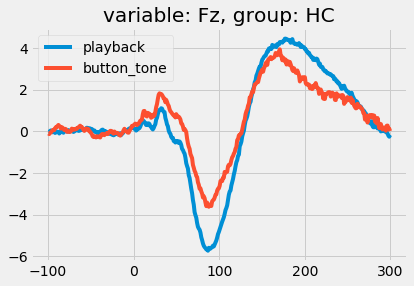

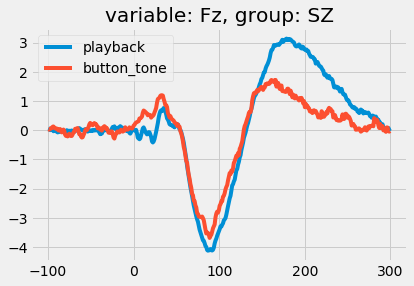

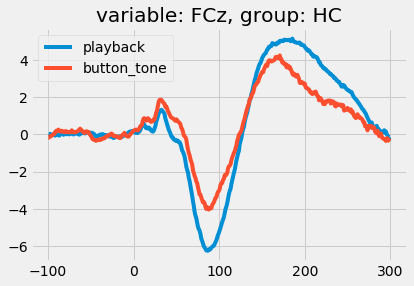

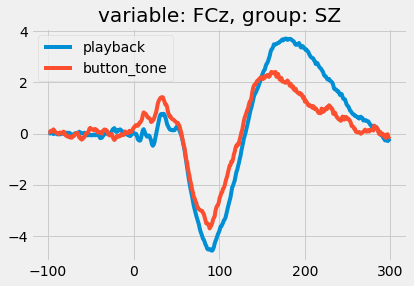

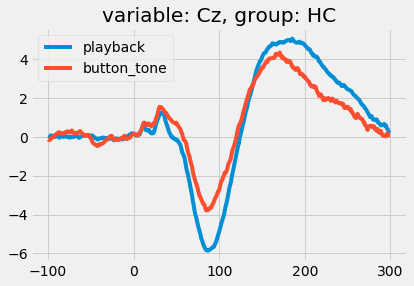

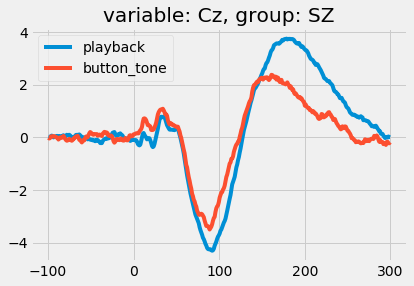

In [9]:
plt.style.use('fivethirtyeight')
gaERPs['variable'].unique()
PB=gaERPs[gaERPs['condition']=='playback']
BT=gaERPs[gaERPs['condition']=='button_tone']
for v in gaERPs['variable'].unique():
    for g in gaERPs[' group'].unique():
        cond = {'variable': v, 'group': g}
        PBc = PB.loc[(PB['variable'] == cond['variable']) & (PB[' group'] == cond['group']), ['time_ms','value']]
        BTc = BT.loc[(BT['variable'] == cond['variable']) & (BT[' group'] == cond['group']), ['time_ms','value']]
        plt.figure()
        plt.plot(PBc['time_ms'], PBc['value'])
        plt.plot(BTc['time_ms'], BTc['value'])
        plt.title('variable: {variable}, group: {group}'.format(**cond))
        plt.legend(['playback','button_tone'])